In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Dense, Input, Conv2D, MaxPool2D, Flatten
from keras.optimizers import SGD
from keras.losses import categorical_crossentropy
from keras.activations import relu, softmax
from sklearn.preprocessing import OneHotEncoder
import numpy as np

Using TensorFlow backend.


In [2]:
FILE_PATH = '~/Downloads/digit-recognizer/train.csv'

In [3]:
df = pd.read_csv(FILE_PATH)
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
y = df['label'].values
y[:5]

array([1, 0, 1, 4, 0], dtype=int64)

In [5]:
y_encoder = OneHotEncoder(sparse=False)
y_encoded = y_encoder.fit_transform(y.reshape(-1, 1))
y_encoded[:5]

c:\users\raf\virtualenv\machine-learning\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [6]:
X = df.drop('label', axis=1).values
X[:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [7]:
X = X.reshape(-1, 28, 28, 1)

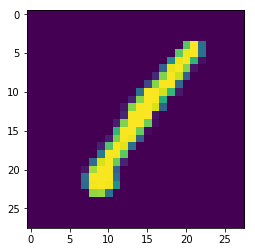

Label: 1


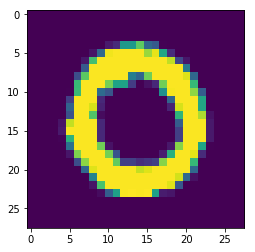

Label: 0


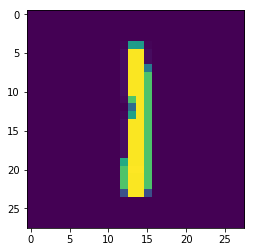

Label: 1


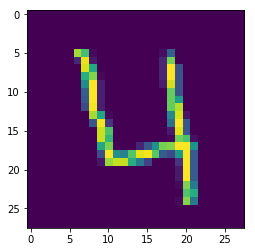

Label: 4


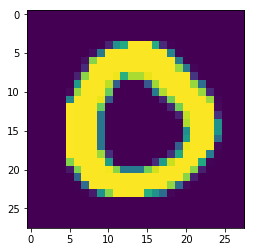

Label: 0


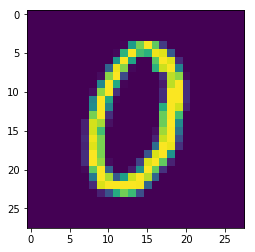

Label: 0


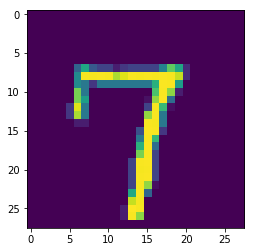

Label: 7


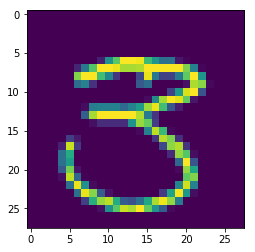

Label: 3


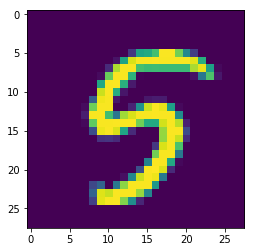

Label: 5


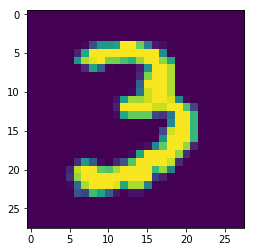

Label: 3


In [8]:
for i in range(10):
    plt.imshow(X[i].reshape(28, 28))
    plt.show()
    print('Label:', y[i])

In [9]:
input_ = Input((28, 28, 1))
conv1 = Conv2D(8, (3, 3), activation=relu)(input_)
conv2 = Conv2D(8, (3, 3), activation=relu)(conv1)
mp1 = MaxPool2D((2,2))(conv2)
conv3= Conv2D(8, (3, 3), activation=relu)(mp1)
conv4 = Conv2D(8, (3, 3), activation=relu)(conv3)
conv5 = Conv2D(8, (3, 3), activation=relu)(conv4)
mp2 = MaxPool2D((2,2))(conv5)
fl = Flatten()(mp2)
dense1 = Dense(8, activation=relu)(fl)
output = Dense(10, activation=softmax)(dense1)

model = Model(inputs=input_, outputs=output)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 8)         584       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 8)         584       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 8)           584       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 6, 6, 8)           584       
__________

In [10]:
y

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

In [11]:
model.compile(SGD(), categorical_crossentropy)

In [12]:
model.fit(X, y_encoded, batch_size=32, epochs=10, validation_split=0.2)

Train on 33600 samples, validate on 8400 samples
Epoch 1/10
33600/33600 [==============================] - 26s 761us/step - loss: 0.9707 - val_loss: 0.3888
Epoch 2/10
33600/33600 [==============================] - 27s 792us/step - loss: 0.3313 - val_loss: 0.2371
Epoch 3/10
33600/33600 [==============================] - 23s 690us/step - loss: 0.2278 - val_loss: 0.2030
Epoch 4/10
33600/33600 [==============================] - 23s 691us/step - loss: 0.1799 - val_loss: 0.1427
Epoch 5/10
33600/33600 [==============================] - 23s 689us/step - loss: 0.1533 - val_loss: 0.1327
Epoch 6/10
33600/33600 [==============================] - 23s 693us/step - loss: 0.1318 - val_loss: 0.1183
Epoch 7/10
33600/33600 [==============================] - 24s 701us/step - loss: 0.1167 - val_loss: 0.1234
Epoch 8/10
33600/33600 [==============================] - 24s 701us/step - loss: 0.1014 - val_loss: 0.1031
Epoch 9/10
33600/33600 [==============================] - 24s 711us/step - loss: 0.0934 - val_l

In [13]:
predictions = model.predict(X)

In [14]:
labels = np.argmax(predictions, axis=1)
labels[:5]

array([1, 0, 1, 4, 0], dtype=int64)